In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load data
Loan_0715 = pd.read_csv('Loan_cleaned.csv')
#Loan_1617 = pd.read_csv('Loan_1617_cleaned.csv')

In [3]:
Loan_0715.head(3)


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq
0,1077501,5000.0,5000.0,4975.0,36 months,10.65,162.87,10+ years,RENT,24000.0,...,861.07,0.0,0.00,0.00,Jan-2015,171.62,Jan-2016,0.0,INDIVIDUAL,0.0
1,1077430,2500.0,2500.0,2500.0,60 months,15.27,59.83,< 1 year,RENT,30000.0,...,435.17,0.0,117.08,1.11,Apr-2013,119.66,Sep-2013,0.0,INDIVIDUAL,0.0
2,1077175,2400.0,2400.0,2400.0,36 months,15.96,84.33,10+ years,RENT,12252.0,...,603.65,0.0,0.00,0.00,Jun-2014,649.91,Jan-2016,0.0,INDIVIDUAL,0.0


In [5]:
#Loan_1617.head(3)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq
0,112435993,2300,2300,2300.0,36 months,12.62,77.08,NaN,OWN,10000.0,...,112.90,0.0,0.0,0.0,Dec-2017,77.08,Dec-2017,0,Individual,0
1,112290210,16000,16000,16000.0,60 months,12.62,360.95,10+ years,MORTGAGE,94000.0,...,873.16,0.0,0.0,0.0,Dec-2017,360.95,Dec-2017,0,Individual,0
2,112436985,6025,6025,6025.0,36 months,15.05,209.01,7 years,MORTGAGE,46350.0,...,348.28,0.0,0.0,0.0,Dec-2017,209.01,Dec-2017,0,Individual,0


In [6]:
# Considering columns for the response variable. Loan_status seems a good candidate, but it is categorical.

# Defining terminologies
    # In Grace period - A grace period is a time period automatically granted on a loan 
    #  during which the borrower does not have to pay the issuer any monies toward the loan, 
    #  and the borrower does not incur any penalties for not paying.
    # Charged off - A charge-off occurs when a lender writes off unpaid debt for tax purposes.

# Loan in good standing - current, fully paid, issued, in grace period
# Loan in bad standing - charged off, late (16-30 days), late (31-120 days), default

# dti - Debt-to-income ratio (DTI) divides the total of all monthly debt payments by gross monthly income

In [20]:
Loan_0715['loan_status'].value_counts()

Current               601779
Fully Paid            209711
Charged Off            46009
Late (31-120 days)     11591
Issued                  8460
In Grace Period         6253
Late (16-30 days)       2357
Default                 1219
Name: loan_status, dtype: int64

In [21]:
Loan_0715.shape

#Since the data is very large, I am going to work with the 2007 to 2015 data only.

(887379, 42)

In [5]:
# converting to numeric
# term is categorical

Loan_0715['term'] = Loan_0715['term'].replace(to_replace = " 36 months", value ="36")
Loan_0715['term'] = Loan_0715['term'].replace(to_replace = " 60 months", value ="60")
Loan_0715['term'] = Loan_0715['term'].replace(to_replace = "60 months", value ="60")
Loan_0715['term'] = Loan_0715['term'].replace(to_replace = "36 months", value ="36")
Loan_0715['term'].value_counts()

36    621125
60    266254
Name: term, dtype: int64

In [6]:
Loan_0715['term'] = pd.to_numeric(Loan_0715['term'])

In [7]:
# Converting emp_length to numeric. This column is categorical as it takes few values.
Loan_0715['emp_length'] = Loan_0715['emp_length'].replace(['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'],
                                            ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

In [8]:
Loan_0715['emp_length'] = pd.to_numeric(Loan_0715['emp_length'])

In [9]:
Loan_0715.isna().sum()

id                                0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
emp_length                    44825
home_ownership                    0
annual_inc                        4
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
purpose                           0
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                      29
earliest_cr_line                 29
inq_last_6mths                   29
open_acc                         29
pub_rec                           0
revol_bal                         0
revol_util                      502
total_acc                        29
initial_list_status               0
out_prncp                   

In [10]:
# Dropping rows with null values

Loan_0715 = Loan_0715.dropna()

In [11]:
Loan_0715.isna().sum()

id                            0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_re

In [12]:
Loan_0715.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825482 entries, 0 to 887378
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          825482 non-null  int64  
 1   loan_amnt                   825482 non-null  float64
 2   funded_amnt                 825482 non-null  float64
 3   funded_amnt_inv             825482 non-null  float64
 4   term                        825482 non-null  int64  
 5   int_rate                    825482 non-null  float64
 6   installment                 825482 non-null  float64
 7   emp_length                  825482 non-null  float64
 8   home_ownership              825482 non-null  object 
 9   annual_inc                  825482 non-null  float64
 10  verification_status         825482 non-null  object 
 11  issue_d                     825482 non-null  object 
 12  loan_status                 825482 non-null  object 
 13  pymnt_plan    

In [34]:
# Choosing the numeric columns to check for correlations

Loan_0715_corr = Loan_0715[['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 
        'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 
        'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'acc_now_delinq']]

In [35]:
Loan_0715_corr.corr()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq
loan_amnt,1.000000,0.408105,0.149709,0.944134,0.106380,0.326205,0.046469,-0.001885,-0.035108,0.191973,...,0.481388,0.482442,0.394501,0.541800,0.031466,0.073925,0.052267,0.230415,-0.016375,0.003156
term,0.408105,1.000000,0.433304,0.138958,0.068953,0.051867,0.111411,-0.001617,-0.005322,0.081855,...,0.080466,0.082209,-0.030768,0.387304,0.004381,0.058292,0.036316,0.070348,-0.005175,0.004784
int_rate,0.149709,0.433304,1.000000,0.136518,0.010064,-0.072268,0.162611,0.055793,0.228113,-0.007349,...,0.173147,0.174134,0.054691,0.454418,0.057754,0.108739,0.071332,0.102689,0.013540,0.026804
installment,0.944134,0.138958,0.136518,1.000000,0.090830,0.320606,0.031326,0.006412,-0.003946,0.177509,...,0.522720,0.523592,0.455082,0.504912,0.042045,0.074988,0.054078,0.239808,-0.013769,0.005836
emp_length,0.106380,0.068953,0.010064,0.090830,1.000000,0.064145,0.044093,0.025486,-0.011210,0.038963,...,0.050858,0.052950,0.037763,0.070302,-0.009514,0.004414,0.002959,0.028677,-0.003864,0.009118
annual_inc,0.326205,0.051867,-0.072268,0.320606,0.064145,1.000000,-0.177764,0.046268,0.035400,0.132410,...,0.158891,0.158891,0.148058,0.125862,0.012949,0.006723,0.006048,0.088899,-0.003524,0.014737
dti,0.046469,0.111411,0.162611,0.031326,0.044093,-0.177764,1.000000,-0.008409,-0.017492,0.305586,...,-0.080545,-0.078066,-0.103489,0.024637,-0.010809,0.004025,0.005380,-0.057900,-0.000205,0.007177
delinq_2yrs,-0.001885,-0.001617,0.055793,0.006412,0.025486,0.046268,-0.008409,1.000000,0.020329,0.050613,...,-0.033950,-0.033477,-0.040346,0.000546,0.017106,-0.001155,0.000743,-0.020496,0.063029,0.130085
inq_last_6mths,-0.035108,-0.005322,0.228113,-0.003946,-0.011210,0.035400,-0.017492,0.020329,1.000000,0.109801,...,0.078355,0.074424,0.062678,0.086377,0.031270,0.045961,0.034102,0.060395,0.006177,-0.005661
open_acc,0.191973,0.081855,-0.007349,0.177509,0.038963,0.132410,0.305586,0.050613,0.109801,1.000000,...,0.039782,0.041088,0.028206,0.059628,-0.009964,0.001312,0.003085,0.026429,0.009869,0.017499


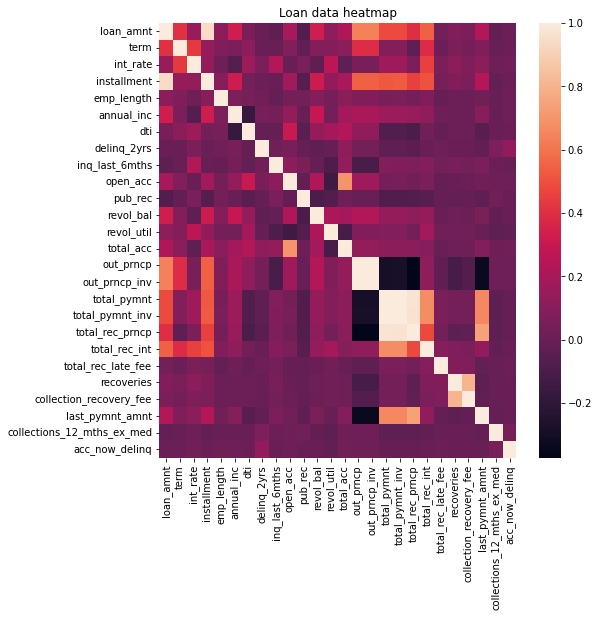

In [36]:
plt.figure(figsize=(8,8))
heat_map = sns.heatmap(Loan_0715_corr.corr())
plt.title( "Loan data heatmap" )
plt.show()

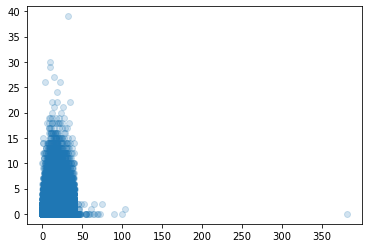

In [37]:
plt.scatter(x='dti', y='delinq_2yrs', data=Loan_0715, alpha=0.2)
plt.show()

In [39]:
print('max dti is ', np.max(Loan_0715.dti))
print('percentiles, 5, 25, 50, 75, and 95 are ', np.percentile(Loan_0715.dti, (5, 25, 50, 75, 95)))

max dti is  380.53
percentiles, 5, 25, 50, 75, and 95 are  [ 5.19 11.86 17.56 23.8  32.55]


In [45]:
#it is hard to see the data pattern with the very large outliers in dti. 
#I am subsetting dti's less than 60 and compare those with delinquency for 2 years.
outliers_removed = Loan_0715[Loan_0715['dti'] < 50]
dti_no_outliers = outliers_removed['dti']
delinq_2yrs_no = outliers_removed['delinq_2yrs']


(array([3.3090e+03, 4.8120e+03, 6.9760e+03, 9.6960e+03, 1.2297e+04,
        1.5204e+04, 1.8085e+04, 2.0996e+04, 2.3836e+04, 2.6604e+04,
        2.8992e+04, 3.1474e+04, 3.3258e+04, 3.4820e+04, 3.5962e+04,
        3.6254e+04, 3.5612e+04, 3.6332e+04, 3.5698e+04, 3.4738e+04,
        3.3751e+04, 3.1991e+04, 3.0165e+04, 2.9031e+04, 2.7294e+04,
        2.4764e+04, 2.2589e+04, 2.0535e+04, 1.9207e+04, 1.7578e+04,
        1.5244e+04, 1.2601e+04, 1.1583e+04, 1.0280e+04, 9.3910e+03,
        7.5040e+03, 4.2670e+03, 3.8800e+03, 3.4590e+03, 3.0950e+03,
        2.2660e+03, 1.0000e+00, 6.0000e+00, 3.0000e+00, 2.0000e+00,
        7.0000e+00, 3.0000e+00, 6.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([ 0.    ,  0.9782,  1.9564,  2.9346,  3.9128,  4.891 ,  5.8692,
         6.8474,  7.8256,  8.8038,  9.782 , 10.7602, 11.7384, 12.7166,
        13.6948, 14.673 , 15.6512, 16.6294, 17.6076, 18.5858, 19.564 ,
        20.5422, 21.5204, 22.4986, 23.4768, 24.455 , 25.4332, 26.4114,
        27.3896, 28.3678, 29.346 ,

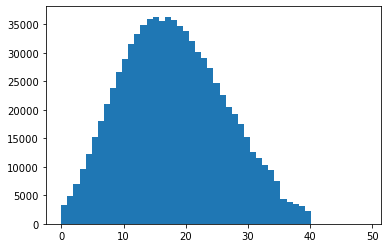

In [46]:
plt.hist(dti_no_outliers, bins=50)

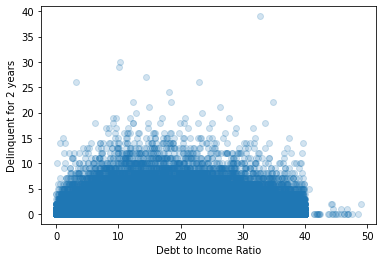

In [48]:
plt.scatter(x=dti_no_outliers, y=delinq_2yrs_no, alpha=0.2)
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Delinquent for 2 years')
plt.show()

# It lookls like most of the 2 year delinquent borrowers have 40 or less dti.  
# But, it doesn't seem to make a big difference whether the person has 0 dti or 40 dti.

In [49]:
# Exploring the loan status column. It is categorical.

loan_status_dti = Loan_0715.groupby('loan_status')['dti'].median()

In [50]:
loan_status_dti

loan_status
Charged Off           18.270
Current               18.150
Default               19.700
Fully Paid            15.710
In Grace Period       19.200
Issued                16.885
Late (16-30 days)     18.880
Late (31-120 days)    19.485
Name: dti, dtype: float64

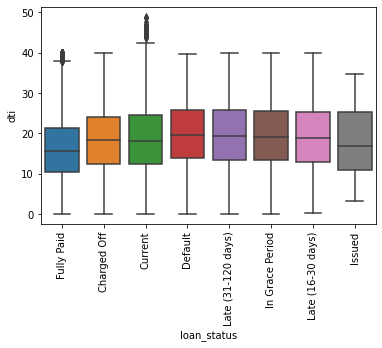

In [52]:
# I will do this plot after excluding the extreme value in current.
_ = sns.boxplot(x='loan_status', y='dti', data=outliers_removed)
plt.xticks(rotation=90)
plt.show()

# The box plot doesn't show significant difference in dti's between the different loan_status categories.

In [13]:
# I am not seening much of a pattern or correlation when I consider the whole data.

# I am now selecting the borrowers whose loan status is not good in order to explore any patterns in those records.

df_bad_status = Loan_0715[Loan_0715['loan_status'].isin(['Charged Off', 'Default', 'Late (16-30 days)', 'Late (31-120 days)'])]

In [14]:
df_bad_status.head(10)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,0.0,RENT,30000.0,...,435.17,0.00,117.08,1.1100,Apr-2013,119.66,Sep-2013,0.0,INDIVIDUAL,0.0
8,1071795,5600.0,5600.0,5600.0,60,21.28,152.39,4.0,OWN,40000.0,...,294.94,0.00,189.06,2.0900,Apr-2012,152.39,Aug-2012,0.0,INDIVIDUAL,0.0
9,1071570,5375.0,5375.0,5350.0,60,12.69,121.45,0.0,RENT,15000.0,...,533.42,0.00,269.29,2.5200,Nov-2012,121.45,Mar-2013,0.0,INDIVIDUAL,0.0
12,1064687,9000.0,9000.0,9000.0,36,13.49,305.38,0.0,RENT,30000.0,...,570.26,0.00,444.30,4.1600,Jul-2012,305.38,Nov-2012,0.0,INDIVIDUAL,0.0
14,1069057,10000.0,10000.0,10000.0,36,10.65,325.74,3.0,RENT,100000.0,...,1393.42,0.00,645.10,6.3145,Oct-2013,325.74,Mar-2014,0.0,INDIVIDUAL,0.0
21,1039153,21000.0,21000.0,21000.0,36,12.42,701.73,10.0,RENT,105000.0,...,3330.44,0.00,0.00,0.0000,Sep-2013,701.73,Jan-2016,0.0,INDIVIDUAL,0.0
24,1069559,6000.0,6000.0,6000.0,36,11.71,198.46,1.0,RENT,76000.0,...,475.25,0.00,269.31,2.5700,Oct-2012,198.46,Mar-2013,0.0,INDIVIDUAL,0.0
27,1069657,5000.0,5000.0,5000.0,60,16.77,123.65,2.0,RENT,50004.0,...,719.11,0.00,260.96,2.3000,Dec-2012,123.65,May-2013,0.0,INDIVIDUAL,0.0
46,1069465,5000.0,5000.0,5000.0,36,8.90,158.77,10.0,MORTGAGE,100000.0,...,696.99,0.00,107.00,1.0700,Aug-2014,158.77,Dec-2014,0.0,INDIVIDUAL,0.0
50,1069248,15000.0,15000.0,15000.0,36,9.91,483.38,8.0,MORTGAGE,80000.0,...,2374.34,24.17,222.81,36.3708,Oct-2014,483.38,Mar-2015,0.0,INDIVIDUAL,0.0


In [15]:
df_bad_status.shape

(56956, 42)

In [18]:
# Comparing the interst rate of the borrowers who are in bad status versus the interest rate of all borrowers.

print(df_bad_status['int_rate'].mean())
print(df_bad_status['int_rate'].median())
print(df_bad_status['int_rate'].std())
print(np.percentile(df_bad_status['int_rate'], (5, 25, 50, 75, 95)))

16.023882470677265
15.62
4.292283694778584
[ 8.9  13.05 15.62 18.85 23.76]


In [19]:
# Summary statistics of interest rate for the whole data.

print(Loan_0715['int_rate'].mean())
print(Loan_0715['int_rate'].median())
print(Loan_0715['int_rate'].std())
print(np.percentile(Loan_0715['int_rate'], (5, 25, 50, 75, 95)))

13.258476659742353
12.99
4.385938009214532
[ 6.62  9.99 12.99 16.2  20.99]


In [ ]:
# It looks like those borrowers with higher interest rate are ending up being in bad status with their loan. 
# It seems like high interest rate may have contribution to their struggle to pay their loan.

In [21]:
# Comparing the debt-to-income ratio of the borrowers who are in bad status versus the interest rate of all borrowers.

print(df_bad_status['dti'].mean())
print(df_bad_status['dti'].median())
print(df_bad_status['dti'].std())
print(np.percentile(df_bad_status['dti'], (5, 25, 50, 75, 95)))

18.644575286185933
18.53
8.052836625668668
[ 5.49   12.72   18.53   24.38   32.2725]


In [22]:
# Summary statistics of interest rate for the whole data.

print(Loan_0715['dti'].mean())
print(Loan_0715['dti'].median())
print(Loan_0715['dti'].std())
print(np.percentile(Loan_0715['dti'], (5, 25, 50, 75, 95)))

18.036753557315027
17.56
8.263914094221507
[ 5.19 11.86 17.56 23.8  32.55]


In [ ]:
# Those customers with loan's in bad status seem to have a little bit higher dti than the dti for the whole data.

In [23]:
# Comparing the employment length of the borrowers who are in bad status versus the interest rate of all borrowers.

print(df_bad_status['emp_length'].mean())
print(df_bad_status['emp_length'].median())
print(df_bad_status['emp_length'].std())
print(np.percentile(df_bad_status['emp_length'], (5, 25, 50, 75, 95)))

5.795737060186811
6.0
3.6353293434941483
[ 0.  2.  6. 10. 10.]


In [24]:
# Summary statistics of interest rate for the whole data.

print(Loan_0715['emp_length'].mean())
print(Loan_0715['emp_length'].median())
print(Loan_0715['emp_length'].std())
print(np.percentile(Loan_0715['emp_length'], (5, 25, 50, 75, 95)))

6.011639260456315
6.0
3.664008529313139
[ 0.  3.  6. 10. 10.]


In [ ]:
# There is not much a difference in employment length between those in bad loan status versus the whole data.

In [25]:
# Comparing the annual income of the borrowers who are in bad status versus the interest rate of all borrowers.

print(df_bad_status['annual_inc'].mean())
print(df_bad_status['annual_inc'].median())
print(df_bad_status['annual_inc'].std())
print(np.percentile(df_bad_status['annual_inc'], (5, 25, 50, 75, 95)))

67685.49422097759
59000.0
55876.76403731984
[ 27000.  42000.  59000.  80000. 137000.]


In [26]:
# Summary statistics of interest rate for the whole data.

print(Loan_0715['annual_inc'].mean())
print(Loan_0715['annual_inc'].median())
print(Loan_0715['annual_inc'].std())
print(np.percentile(Loan_0715['annual_inc'], (5, 25, 50, 75, 95)))

76269.33895958979
65000.0
65357.14890015482
[ 30000.  47000.  65000.  90000. 152000.]


In [ ]:
# It looks like those with bad loan status have lower annual income compared to the annual income for the whole data.

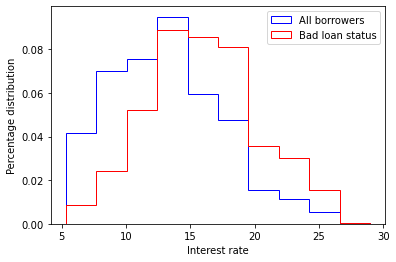

In [41]:
# Comparing interest rate distribution for all borrowers versus those with bad loan status.

_ = plt.hist(Loan_0715['int_rate'], histtype='step', density = True, color='blue', label='All borrowers')
_ = plt.hist(df_bad_status['int_rate'], histtype='step', density = True, color='red', label='Bad loan status')
_ = plt.xlabel('Interest rate')
_ = plt.ylabel('Percentage distribution')
plt.legend()

plt.show()

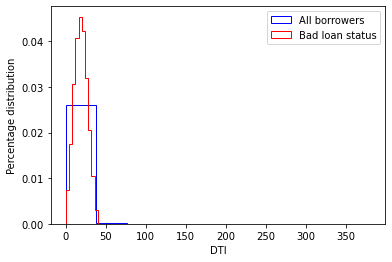

In [47]:
# I will do this plot after excluding the extreme value in current.
_ = plt.hist(Loan_0715['dti'], histtype='step', density = True, color='blue', label='All borrowers')
_ = plt.hist(df_bad_status['dti'], histtype='step', density = True, color='red', label='Bad loan status')
_ = plt.xlabel('DTI')
_ = plt.ylabel('Percentage distribution')
plt.legend()

plt.show()

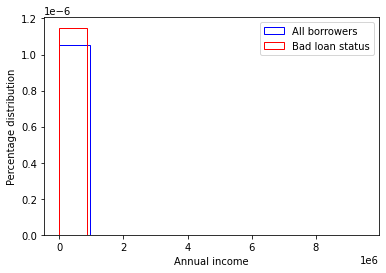

In [48]:
# I will do this plot after excluding the extreme value in current.
_ = plt.hist(Loan_0715['annual_inc'], histtype='step', density = True, color='blue', label='All borrowers')
_ = plt.hist(df_bad_status['annual_inc'], histtype='step', density = True, color='red', label='Bad loan status')
_ = plt.xlabel('Annual income')
_ = plt.ylabel('Percentage distribution')
plt.legend()

plt.show()

In [ ]:
# To further explore

# Patterns in data for those who are in bad loan status versus:

   # interest rate
   # dti
   # annual income
    
# Can I choose Loan_status to be my dependent varialble (as it is a categorical variable) ???